In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

from IPython.display import Image

reference = lambda file, w=None, h=None : \
    Image(filename=file, width=w, height=h) 
    

population_xls = './data/Report_seoul_population_2019_2Q.xls'

In [3]:
population = pd.read_excel(population_xls,
                          header=2,
                          usecols='B,C,D,M,N')
population.head()

,자치구,세대,계,세대당인구,65세이상고령자
0,합계,4304243,10041574,2.27,1451564
1,종로구,73828,162413,2.06,27155
2,중구,62156,136276,2.03,22749
3,용산구,109692,245069,2.09,38259
4,성동구,136872,312991,2.23,43370


In [4]:
population.tail()

,자치구,세대,계,세대당인구,65세이상고령자
21,관악구,266692,519864,1.88,73693
22,서초구,172907,435631,2.49,55853
23,강남구,230752,547602,2.35,69011
24,송파구,278223,686181,2.44,84740
25,강동구,177368,428547,2.39,60657


In [5]:
population['자치구'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype=object)

In [6]:
population = population.drop([0])

In [7]:
population

,자치구,세대,계,세대당인구,65세이상고령자
1,종로구,73828,162413,2.06,27155
2,중구,62156,136276,2.03,22749
3,용산구,109692,245069,2.09,38259
4,성동구,136872,312991,2.23,43370
5,광진구,163914,369470,2.16,46773
6,동대문구,162851,363101,2.13,58078
7,중랑구,181383,405639,2.21,63670
8,성북구,190253,452292,2.31,69341
9,강북구,143650,319377,2.20,59189
10,도봉구,138460,339001,2.43,57367


In [8]:
population.rename(columns = {'계':'인구수'}, inplace=True)
population.rename(columns={'자치구':'구'}, inplace=True)
population.head()

,구,세대,인구수,세대당인구,65세이상고령자
1,종로구,73828,162413,2.06,27155
2,중구,62156,136276,2.03,22749
3,용산구,109692,245069,2.09,38259
4,성동구,136872,312991,2.23,43370
5,광진구,163914,369470,2.16,46773


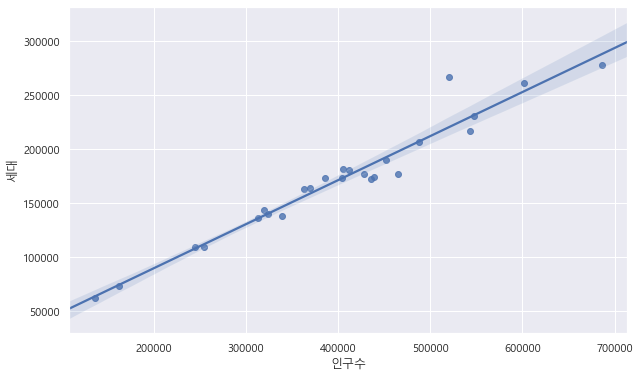

In [9]:
sns.regplot(x='인구수', y='세대', data=population);

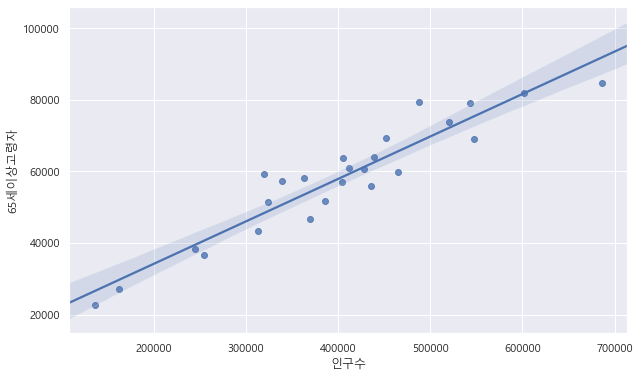

In [10]:
sns.regplot(x='인구수', y='65세이상고령자', data=population);

In [11]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [12]:
geo_path = 'data/skorea_municipalities_geo_simple.json'

geo_str = json.load(open(geo_path, encoding='utf-8'))

In [13]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['인구수']})
guDat

,gu,counts
1,종로구,162413
2,중구,136276
3,용산구,245069
4,성동구,312991
5,광진구,369470
6,동대문구,363101
7,중랑구,405639
8,성북구,452292
9,강북구,319377
10,도봉구,339001


In [14]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map

In [17]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu','counts'],
              fill_color='YlGnBu',
              key_on='feature.id')
map

In [23]:
guDat_1 = pd.DataFrame({'gu':population['구'], 
                        'counts':population['65세이상고령자']})
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat_1,
              columns=['gu', 'counts'],
              fill_color='YlGnBu',
              key_on='feature.id')

In [24]:
map